In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
import variable_bin_methods as vbm
import pickle
import copy
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import GridSearchCV

# 读取数据

In [2]:
data_train = pd.read_excel('最终2018年改变分箱最后19个特征数据的入模训练集.xlsx')

In [3]:
data_test_1 = pd.read_excel('最终2019年-1改变分箱最后19个特征数据的入模测试集.xlsx')
data_test_2 = pd.read_excel('最终2019年-2改变分箱最后19个特征数据的入模测试集.xlsx')
data_test_3 = pd.read_excel('最终2019年-3改变分箱最后19个特征数据的入模测试集.xlsx')
data_test_4 = pd.read_excel('最终2019年-4改变分箱最后19个特征数据的入模测试集.xlsx')

In [4]:
data_train = data_train.drop(columns = ['mths_since_recent_inq'])
data_test_1 = data_test_1.drop(columns = ['mths_since_recent_inq'])
data_test_2 = data_test_2.drop(columns = ['mths_since_recent_inq'])
data_test_3 = data_test_3.drop(columns = ['mths_since_recent_inq'])
data_test_4 = data_test_4.drop(columns = ['mths_since_recent_inq'])

In [5]:
X_train = data_train.drop(columns = ['loan_status'])
y_train = data_train['loan_status']

In [6]:
X_test_1 = data_test_1.drop(columns = ['loan_status'])
y_test_1 = data_test_1['loan_status']
X_test_2 = data_test_2.drop(columns = ['loan_status'])
y_test_2 = data_test_2['loan_status']
X_test_3 = data_test_3.drop(columns = ['loan_status'])
y_test_3 = data_test_3['loan_status']
X_test_4 = data_test_4.drop(columns = ['loan_status'])
y_test_4 = data_test_4['loan_status']

# 模型训练

In [7]:
LR_model = LogisticRegression(C = 0.01,penalty = 'l2',solver = 'saga',
                                class_weight = {1: 1, 0: 1})

In [8]:
LR_model_fit = LR_model.fit(X_train,y_train)

In [9]:
## 保存模型
LR_model_save = open('LR_model_fit.pkl','wb')
pickle.dump(LR_model_fit,LR_model_save)
LR_model_save.close()

## 模型预测

In [10]:
y_pred_lr = LR_model_fit.predict(X_train)
y_proba_lr = LR_model_fit.predict_proba(X_train)

In [11]:
y_pred_lr_1 = LR_model_fit.predict(X_test_1)
y_proba_lr_1 = LR_model_fit.predict_proba(X_test_1)

In [12]:
y_pred_lr_2 = LR_model_fit.predict(X_test_2)
y_proba_lr_2 = LR_model_fit.predict_proba(X_test_2)

In [13]:
y_pred_lr_3 = LR_model_fit.predict(X_test_3)
y_proba_lr_3 = LR_model_fit.predict_proba(X_test_3)

In [14]:
y_pred_lr_4 = LR_model_fit.predict(X_test_4)
y_proba_lr_4 = LR_model_fit.predict_proba(X_test_4)

# 模型评估

## 混淆矩阵

In [15]:
cm_lr1 = confusion_matrix(y_test_1,y_pred_lr_1)
cm_lr1 = pd.DataFrame(cm_lr1,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cm_lr1

预测为好  预测为坏
标签为好  24062   155
标签为坏   9186   216

In [16]:
cm_lr2 = confusion_matrix(y_test_2,y_pred_lr_2)
cm_lr2 = pd.DataFrame(cm_lr2,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cm_lr2

预测为好  预测为坏
标签为好  23942   183
标签为坏   9272   198

In [17]:
cm_lr3 = confusion_matrix(y_test_3,y_pred_lr_3)
cm_lr3 = pd.DataFrame(cm_lr3,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cm_lr3

预测为好  预测为坏
标签为好  24339   209
标签为坏   9024   220

In [18]:
cm_lr4 = confusion_matrix(y_test_4,y_pred_lr_4)
cm_lr4 = pd.DataFrame(cm_lr4,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cm_lr4

预测为好  预测为坏
标签为好  23994   164
标签为坏   9193   190

## 评估指标

In [19]:
acc_lr1 = accuracy_score(y_test_1,y_pred_lr_1)
kappa_lr1 = cohen_kappa_score(y_test_1,y_pred_lr_1)
auc_lr1 = roc_auc_score(y_test_1, y_proba_lr_1[:,1])
fpr_lr1, tpr_lr1, thresholds_roc_lr2 = roc_curve(y_test_1, y_proba_lr_1[:,1])
ks_lr1 = max([trp_1 - fpr_1 for trp_1, fpr_1 in zip(tpr_lr1, fpr_lr1)])
results1 = pd.DataFrame()
results1['准确率_1'] = [acc_lr1]
results1['AUC_1'] = [auc_lr1]
results1['KS值_1'] = [ks_lr1]
results1['kappa_1'] = [kappa_lr1]
results1.index = ['逻辑回归']
results1

准确率_1    AUC_1     KS值_1   kappa_1
逻辑回归  0.722151  0.63833  0.193261  0.023469

In [20]:
acc_lr2 = accuracy_score(y_test_2,y_pred_lr_2)
kappa_lr2 = cohen_kappa_score(y_test_2,y_pred_lr_2)
auc_lr2 = roc_auc_score(y_test_2, y_proba_lr_2[:,1])
fpr_lr2, tpr_lr2, thresholds_roc_lr2 = roc_curve(y_test_2, y_proba_lr_2[:,1])
ks_lr2 = max([trp_2 - fpr_2 for trp_2, fpr_2 in zip(tpr_lr2, fpr_lr2)])
results2 = pd.DataFrame()
results2['准确率_2'] = [acc_lr2]
results2['AUC_2'] = [auc_lr2]
results2['KS值_2'] = [ks_lr2]
results2['kappa_2'] = [kappa_lr2]
results2.index = ['逻辑回归']
results2

准确率_2     AUC_2     KS值_2   kappa_2
逻辑回归  0.718559  0.632822  0.188387  0.018804

In [21]:
acc_lr = accuracy_score(y_test_3,y_pred_lr_3)
kappa_lr = cohen_kappa_score(y_test_3,y_pred_lr_3)
auc_lr = roc_auc_score(y_test_3, y_proba_lr_3[:,1])
fpr_lr, tpr_lr, thresholds_roc_lr = roc_curve(y_test_3,y_proba_lr_3[:,1])
ks_lr = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_lr, fpr_lr)])
results3 = pd.DataFrame()
results3['准确率_3'] = [acc_lr]
results3['AUC_3'] = [auc_lr]
results3['KS值_3'] = [ks_lr]
results3['kappa_3'] = [kappa_lr]
results3.index = ['逻辑回归']
results3

准确率_3     AUC_3     KS值_3   kappa_3
逻辑回归  0.72677  0.635877  0.193716  0.021751

In [22]:
acc_lr = accuracy_score(y_test_4,y_pred_lr_4)
kappa_lr = cohen_kappa_score(y_test_4,y_pred_lr_4)
auc_lr = roc_auc_score(y_test_4, y_proba_lr_4[:,1])
fpr_lr, tpr_lr, thresholds_roc_lr = roc_curve(y_test_4,y_proba_lr_4[:,1])
ks_lr = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_lr, fpr_lr)])
results4 = pd.DataFrame()
results4['准确率_4'] = [acc_lr]
results4['AUC_4'] = [auc_lr]
results4['KS值_4'] = [ks_lr]
results4['kappa_4'] = [kappa_lr]
results4.index = ['逻辑回归']
results4

准确率_4     AUC_4     KS值_4   kappa_4
逻辑回归  0.721028  0.635129  0.192104  0.019073

In [23]:
acc1=[results1['准确率_1'],results2['准确率_2'],results3['准确率_3'],results4['准确率_4']]
ac1=np.mean(acc1)
bc1=np.std(acc1)

In [24]:
acc2=[results1['AUC_1'],results2['AUC_2'],results3['AUC_3'],results4['AUC_4']]
ac2=np.mean(acc2)
bc2=np.std(acc2)

In [25]:
acc3=[results1['KS值_1'],results2['KS值_2'],results3['KS值_3'],results4['KS值_4']]
ac3=np.mean(acc3)
bc3=np.std(acc3)

In [26]:
acc4=[results1['kappa_1'],results2['kappa_2'],results3['kappa_3'],results4['kappa_4']]
ac4=np.mean(acc4)
bc4=np.std(acc4)

In [27]:
results11 =pd.DataFrame({'准确率的均值':{'逻辑回归':ac1},'准确率的方差':{'逻辑回归':bc1},
                   'AUC的均值':{'逻辑回归':ac2},'KS值的均值':{'逻辑回归':ac3},
                   'kappa的均值':{'逻辑回归':ac4}})
results11

准确率的均值    准确率的方差    AUC的均值    KS值的均值  kappa的均值
逻辑回归  0.722127  0.002979  0.635539  0.191867  0.020774

## ROC和KS曲线

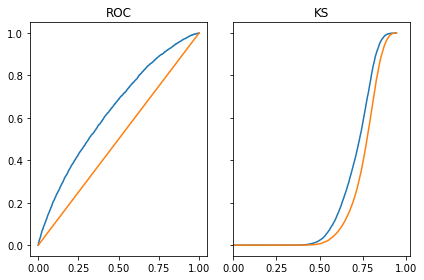

In [28]:
y_proba_1 = y_proba_lr_1
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_1))):
    fpr,tpr,thresholds = roc_curve(y_test_1,y_proba_1[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

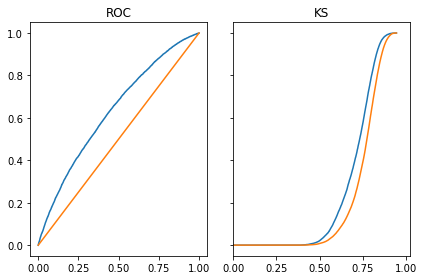

In [29]:
y_proba_2= y_proba_lr_2
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_2))):
    fpr,tpr,thresholds = roc_curve(y_test_2,y_proba_2[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

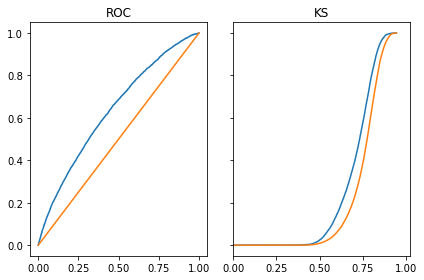

In [30]:
y_proba_3= y_proba_lr_3
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_3))):
    fpr,tpr,thresholds = roc_curve(y_test_3,y_proba_3[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

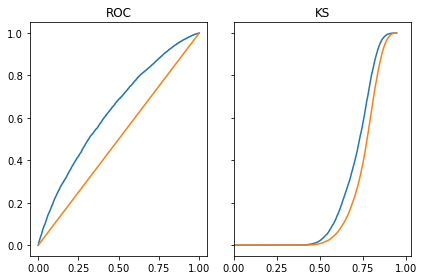

In [31]:
y_proba_4= y_proba_lr_4
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_4))):
    fpr,tpr,thresholds = roc_curve(y_test_4,y_proba_4[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

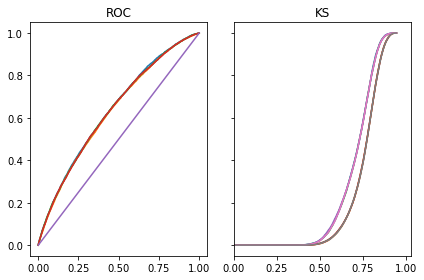

In [32]:
y_proba_1= y_proba_lr_1
y_proba_2= y_proba_lr_2
y_proba_3= y_proba_lr_3
y_proba_4= y_proba_lr_4
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_1))):
    fpr_1,tpr_1,thresholds_1 = roc_curve(y_test_1,y_proba_1[:,i],pos_label = i)
for i in range(len(np.unique(y_test_2))):
    fpr_2,tpr_2,thresholds_2 = roc_curve(y_test_2,y_proba_2[:,i],pos_label = i)
for i in range(len(np.unique(y_test_3))):
    fpr_3,tpr_3,thresholds_3 = roc_curve(y_test_3,y_proba_3[:,i],pos_label = i)
for i in range(len(np.unique(y_test_4))):
    fpr_4,tpr_4,thresholds_4 = roc_curve(y_test_4,y_proba_4[:,i],pos_label = i)    
axe1.plot(fpr_1,tpr_1)
axe1.plot(fpr_2,tpr_2)
axe1.plot(fpr_3,tpr_3)
axe1.plot(fpr_4,tpr_4)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds_1,tpr_1,label = 'TPR')
axe2.plot(1 - thresholds_1,fpr_1,label = 'FPR')
axe2.plot(1 - thresholds_2,tpr_2,label = 'TPR')
axe2.plot(1 - thresholds_2,fpr_2,label = 'FPR')
axe2.plot(1 - thresholds_3,tpr_3,label = 'TPR')
axe2.plot(1 - thresholds_3,fpr_3,label = 'FPR')
axe2.plot(1 - thresholds_4,tpr_4,label = 'TPR')
axe2.plot(1 - thresholds_4,fpr_4,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

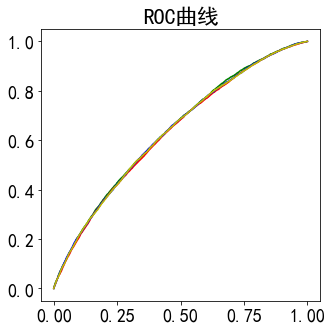

In [33]:
import matplotlib.font_manager as fm
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']   
matplotlib.rcParams['axes.unicode_minus']=False  
font={'family':'SimHei',"size":18}
matplotlib.rc("font",**font)
fig=plt.figure(figsize=(5,5))
plt.title('ROC曲线')
plt.plot(fpr_1,tpr_1,color='g',label="ROC_1")
plt.plot(fpr_2,tpr_2,color='r',label="ROC_2")
plt.plot(fpr_3,tpr_3,color='b',label="ROC_3")
plt.plot(fpr_4,tpr_4,color='y',label="ROC_4")
plt.show()

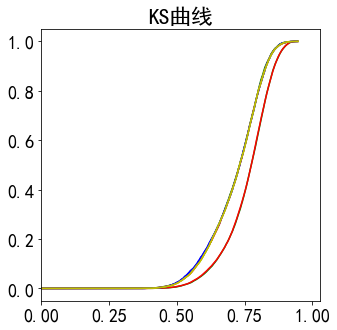

In [34]:
matplotlib.rcParams['font.sans-serif']=['SimHei']   
matplotlib.rcParams['axes.unicode_minus']=False  
font={'family':'SimHei',"size":18}
matplotlib.rc("font",**font)
fig=plt.figure(figsize=(5,5))
plt.title('KS曲线')
plt.plot(1 - thresholds_1,tpr_1,color='g',label='TPR')
plt.plot(1 - thresholds_1,fpr_1,color='g',label='FPR')
plt.plot(1 - thresholds_2,tpr_2,color='r',label='TPR')
plt.plot(1 - thresholds_2,fpr_2,color='r',label='FPR')
plt.plot(1 - thresholds_3,tpr_3,color='b',label='TPR')
plt.plot(1 - thresholds_3,tpr_3,color='b',label='FPR')
plt.plot(1 - thresholds_4,tpr_4,color='y',label='TPR')
plt.plot(1 - thresholds_4,tpr_4,color='y',label='FPR')
plt.xlim(0,)
plt.show()

## k折交叉检验

In [35]:
import warnings
warnings.filterwarnings("ignore") ##忽略警告

In [36]:
#ef muti_score(model):
warnings.filterwarnings('ignore')
accuracy = cross_val_score(LR_model, X_train, y_train, scoring='accuracy', cv=5)
acc_mean=accuracy.mean()
acc_std=accuracy.std()
results = pd.DataFrame()
results["准确率均值"] = [acc_mean]
results["准确率标准差"] = [acc_std]
results.index = ['逻辑回归']
results
#rint("准确率均值",accuracy.mean())
#rint("准确率方差",accuracy.var())

准确率均值   准确率标准差
逻辑回归  0.74974  0.00028

## 模型psi计算

In [37]:
def cal_psi(actual, predict, bins):
    actual_min = actual.min()  # 实际中的最小概率
    actual_max = actual.max()  # 实际中的最大概率
    binlen = (actual_max - actual_min) / bins
    cuts = [actual_min + i * binlen for i in range(1, bins)]#设定分组
    cuts.insert(0, -float("inf"))
    cuts.append(float("inf"))
    actual_cuts = np.histogram(actual, bins=cuts)#将actual等距分箱
    predict_cuts = np.histogram(predict, bins=cuts)#将predict按actual的分组等距分箱
    actual_df = pd.DataFrame(actual_cuts[0],columns=['actual'])
    predict_df = pd.DataFrame(predict_cuts[0], columns=['predict'])
    psi_df = pd.merge(actual_df,predict_df,right_index=True,left_index=True)
    psi_df['actual_rate'] = (psi_df['actual'] + 1) / psi_df['actual'].sum()#计算占比，分子加1，防止计算PSI时分子分母为0
    psi_df['predict_rate'] = (psi_df['predict'] + 1) / psi_df['predict'].sum()
    psi_df['psi'] = (psi_df['actual_rate'] - psi_df['predict_rate']) * np.log(
        psi_df['actual_rate'] / psi_df['predict_rate'])
    psi = psi_df['psi'].sum()
    return psi, psi_df

In [38]:
psi_values11=cal_psi(y_proba_lr[:,1],y_proba_lr_1[:,1],10)
psi_values11

(0.001261076372877717,
    actual  predict  actual_rate  predict_rate       psi
 0    6477      882     0.024901      0.026265  0.000073
 1   46393     5944     0.178336      0.176835  0.000013
 2   82960    10416     0.318898      0.309855  0.000260
 3   58670     7661     0.225528      0.227907  0.000025
 4   32366     4460     0.124417      0.132693  0.000533
 5   19698     2597     0.075722      0.077278  0.000032
 6    9874     1242     0.037959      0.036973  0.000026
 7    3069      343     0.011801      0.010232  0.000224
 8     582       64     0.002241      0.001933  0.000045
 9      60       10     0.000234      0.000327  0.000031)

In [39]:
psi_values12=cal_psi(y_proba_lr[:,1],y_proba_lr_2[:,1],10)
psi_values12

(0.0010643626770059287,
    actual  predict  actual_rate  predict_rate       psi
 0    6477      882     0.024901      0.026284  0.000075
 1   46393     6046     0.178336      0.179997  0.000015
 2   82960    10296     0.318898      0.306504  0.000491
 3   58670     7702     0.225528      0.229290  0.000062
 4   32366     4377     0.124417      0.130317  0.000273
 5   19698     2608     0.075722      0.077660  0.000049
 6    9874     1233     0.037959      0.036732  0.000040
 7    3069      379     0.011801      0.011311  0.000021
 8     582       67     0.002241      0.002024  0.000022
 9      60        5     0.000234      0.000179  0.000015)

In [40]:
psi_values13=cal_psi(y_proba_lr[:,1],y_proba_lr_3[:,1],10)
psi_values13

(0.0011136537645807056,
    actual  predict  actual_rate  predict_rate           psi
 0    6477      938     0.024901      0.027788  3.165910e-04
 1   46393     6127     0.178336      0.181345  5.032736e-05
 2   82960    10403     0.318898      0.307884  3.871574e-04
 3   58670     7634     0.225528      0.225941  7.541687e-07
 4   32366     4358     0.124417      0.128995  1.654155e-04
 5   19698     2587     0.075722      0.076586  9.806727e-06
 6    9874     1263     0.037959      0.037405  8.136565e-06
 7    3069      417     0.011801      0.012370  2.678149e-05
 8     582       62     0.002241      0.001864  6.931682e-05
 9      60        3     0.000234      0.000118  7.936674e-05)

In [41]:
psi_values14=cal_psi(y_proba_lr[:,1],y_proba_lr_4[:,1],10)
psi_values14

(0.0013803557635795323,
    actual  predict  actual_rate  predict_rate       psi
 0    6477      908     0.024901      0.027101  0.000186
 1   46393     6028     0.178336      0.179750  0.000011
 2   82960    10424     0.318898      0.310814  0.000208
 3   58670     7494     0.225528      0.223458  0.000019
 4   32366     4424     0.124417      0.131928  0.000440
 5   19698     2631     0.075722      0.078471  0.000098
 6    9874     1212     0.037959      0.036165  0.000087
 7    3069      360     0.011801      0.010763  0.000096
 8     582       52     0.002241      0.001580  0.000231
 9      60        8     0.000234      0.000268  0.000005)

In [42]:
bcc2=[psi_values11[0],psi_values12[0],psi_values13[0],psi_values14[0]]
bbc2=np.mean(bcc2)
bbc2

0.001204862144510971

In [43]:
results111 =pd.DataFrame({'PSI':{'逻辑回归':bbc2},'PSI_1':{'逻辑回归':psi_values11[0]},'PSI_2':{'逻辑回归':psi_values12[0]},
                   'PSI_3':{'逻辑回归':psi_values13[0]},'PSI_4':{'逻辑回归':psi_values14[0]}})
results111

PSI     PSI_1     PSI_2     PSI_3    PSI_4
逻辑回归  0.001205  0.001261  0.001064  0.001114  0.00138